In [1]:
import numpy as np
import pandas as pd
import os
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.family']
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname = 'C:/Windows/Fonts/malgun.ttf').get_name()
plt.rc('font', family = font_name)
plt.rcParams['axes.unicode_minus'] = False


In [2]:
datainformation = pd.DataFrame({'SALEDATE' : ['경락 일자'], 'WHSAL_NM' : ['도매시장'], 'CMP_NM' : ['법인'], 'PUM_NM' : ['품목'],
'KIND_NM' : ['품종'], 'DAN_NM' : ['단위'], 'POJ_NM' : ['포장'], 'SIZE_NM' : ['크기'], 'LV_NM' : ['등급'],
'SAN_NM' : ['산지'], 'DANQ' : ['단위중량'],'QTY' : ['물량'], 'COST' : ['단가'], 'TOT_QTY' :['총물량'], 'TOT_AMT' : ['총금액']})
datainformation

,SALEDATE,WHSAL_NM,CMP_NM,PUM_NM,KIND_NM,DAN_NM,POJ_NM,SIZE_NM,LV_NM,SAN_NM,DANQ,QTY,COST,TOT_QTY,TOT_AMT
0,경락 일자,도매시장,법인,품목,품종,단위,포장,크기,등급,산지,단위중량,물량,단가,총물량,총금액


In [3]:
# train data 파일 불러오기
df1 = pd.read_csv("C:/Users/hyun/workspace/TIL/MachineLearning/0_homework/4_viz_train.csv")
df1.tail(2)
# df1.shape

,date,요일,배추_거래량(kg),배추_가격(원/kg),무_거래량(kg),무_가격(원/kg),양파_거래량(kg),양파_가격(원/kg),건고추_거래량(kg),건고추_가격(원/kg),...,청상추_거래량(kg),청상추_가격(원/kg),백다다기_거래량(kg),백다다기_가격(원/kg),애호박_거래량(kg),애호박_가격(원/kg),캠벨얼리_거래량(kg),캠벨얼리_가격(원/kg),샤인마스캇_거래량(kg),샤인마스캇_가격(원/kg)
1731,2020-09-27,일요일,25396.0,3066.0,38222.0,1139.0,18240.0,1056.0,60.0,22333.0,...,144.0,4076.0,285.0,3707.0,2464.0,3252.0,21717.0,3567.0,9734.0,10699.0
1732,2020-09-28,월요일,2405051.9,1867.0,2747519.5,1147.0,2235784.7,964.0,1630.6,22022.0,...,84155.0,4167.0,554862.6,2873.0,667745.0,2782.0,601841.0,3761.0,382263.4,10998.0


### [가설 1. 제철 과일, 채소들은 해당 계절에 가격은 내리고 거래량은 많아질 것이다.]

### [파프리카 제철 : 5~7월]

In [4]:
df_pap = df1[["date", "요일", "파프리카_거래량(kg)", "파프리카_가격(원/kg)"]]
df_pap.columns = ["date", "day", "volume_by_kg", "cost_per_kg"]
#df_pap.head(5)
df_pap = df_pap[df_pap.volume_by_kg != 0]
#df_pap.dtypes
df_pap['date'] = pd.to_datetime(df_pap["date"], format='%Y-%m-%d')
df_pap = df_pap.set_index("date")
df_pap.head(5)
df_pap.shape

(1468, 3)

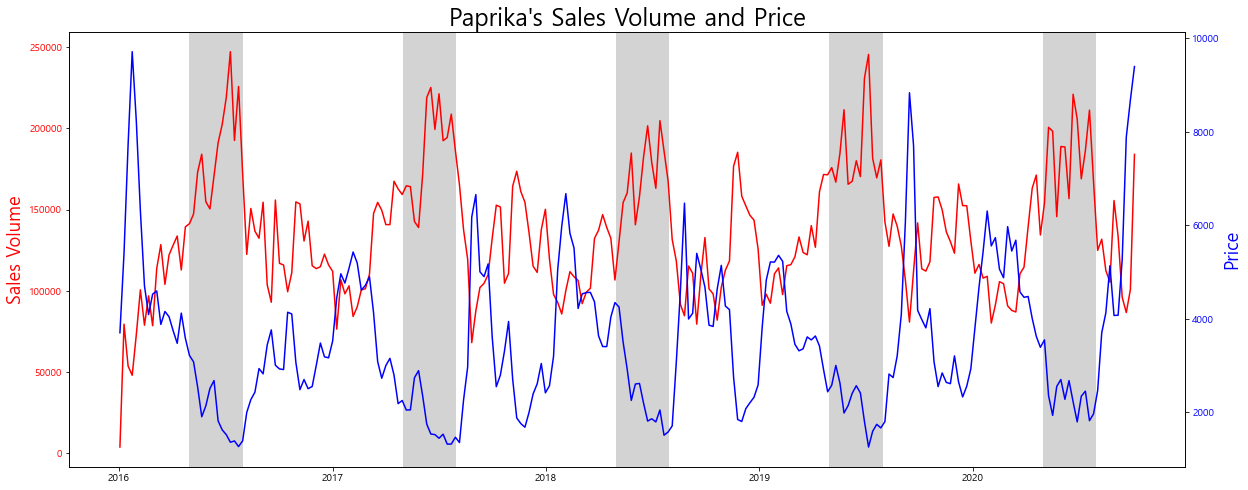

In [5]:
fig = plt.figure()
ax1 = fig.add_subplot()

for i in range(2016,2021):
    span_start = datetime(i, 5, 1)
    span_end = datetime(i, 7, 31)
    plt.axvspan(span_start, span_end, facecolor='lightgrey')
    
ax1.set_title("Paprika's Sales Volume and Price", fontsize=24)
ax1.plot(df_pap["volume_by_kg"].resample("W").mean(), color="red")
ax1.set_ylabel('Sales Volume', fontsize=18, color="red")
ax1.tick_params(axis='y', labelcolor="red")

fig.set_size_inches(20,8)

ax2 = ax1.twinx()
ax2.plot(df_pap["cost_per_kg"].resample("W").mean(), color="blue")
ax2.set_ylabel('Price', fontsize=18, color="blue")
ax2.tick_params(axis='y', labelcolor="blue")

# axvspan 으로 진하게

### [토마토 제철 : 7~9월]

In [6]:
df_tomato = df1[["date", "요일", "토마토_거래량(kg)", "토마토_가격(원/kg)"]]
df_tomato.columns = ["date", "day", "volume_by_kg", "cost_per_kg"]
#df_pap.head(5)
df_tomato = df_tomato[df_tomato.volume_by_kg != 0]
#df_pap.dtypes
df_tomato['date'] = pd.to_datetime(df_tomato["date"], format='%Y-%m-%d')
df_tomato = df_tomato.set_index("date")
df_tomato.head(5)
#df_tomato.shape

,day,volume_by_kg,cost_per_kg
date,,,
2016-01-02,토요일,30950.0,1621.0
2016-01-04,월요일,291057.0,1834.0
2016-01-05,화요일,194626.5,1833.0
2016-01-06,수요일,178811.0,1999.0
2016-01-07,목요일,107346.3,1921.0


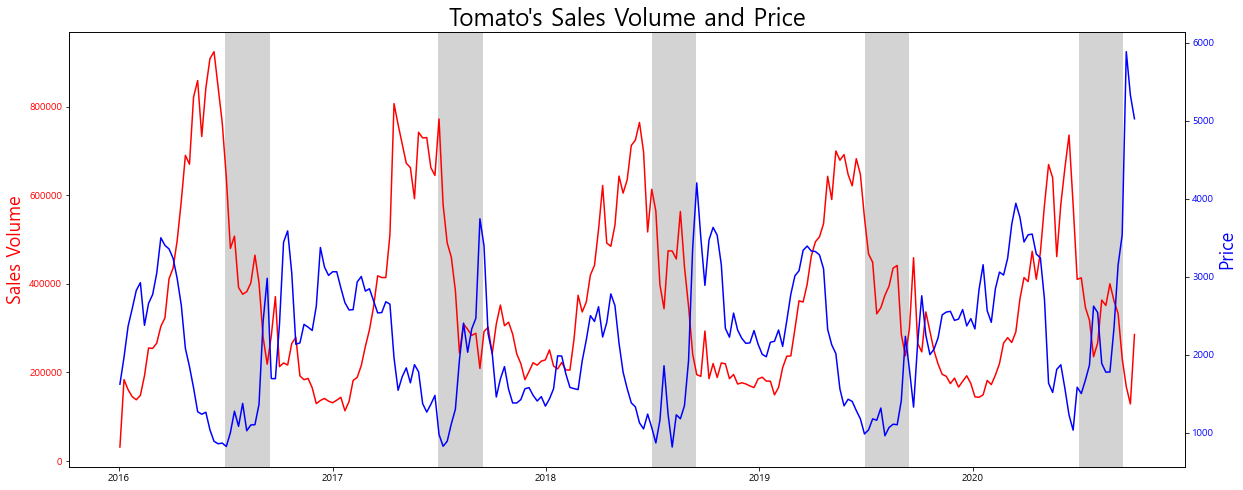

In [7]:
fig = plt.figure()
ax1 = fig.add_subplot()

for i in range(2016,2021):
    span_start = datetime(i, 7, 1)
    span_end = datetime(i, 9, 15)
    plt.axvspan(span_start, span_end, facecolor='lightgrey')
    
ax1.set_title("Tomato's Sales Volume and Price", fontsize=24)
ax1.plot(df_tomato["volume_by_kg"].resample("W").mean(), color="red")
ax1.set_ylabel('Sales Volume', fontsize=18, color="red")
ax1.tick_params(axis='y', labelcolor="red")

fig.set_size_inches(20,8)

ax2 = ax1.twinx()
ax2.plot(df_tomato["cost_per_kg"].resample("W").mean(), color="blue")
ax2.set_ylabel('Price', fontsize=18, color="blue")
ax2.tick_params(axis='y', labelcolor="blue")


In [8]:
df_camb = df1[["date", "요일", "캠벨얼리_거래량(kg)", "캠벨얼리_가격(원/kg)"]]
df_camb.columns = ["date", "day", "volume_by_kg", "cost_per_kg"]
df_camb = df_camb[df_camb.volume_by_kg != 0]
df_camb['date'] = pd.to_datetime(df_camb["date"], format='%Y-%m-%d')
df_camb = df_camb.set_index("date")
df_camb.head(3)
#df_camb.shape

,day,volume_by_kg,cost_per_kg
date,,,
2016-01-02,토요일,880.0,2014.0
2016-01-04,월요일,2703.8,3885.0
2016-01-05,화요일,8810.0,2853.0


### [캠벨얼리 제철 : 7월]
* 캠벨얼리 : 포도같은거

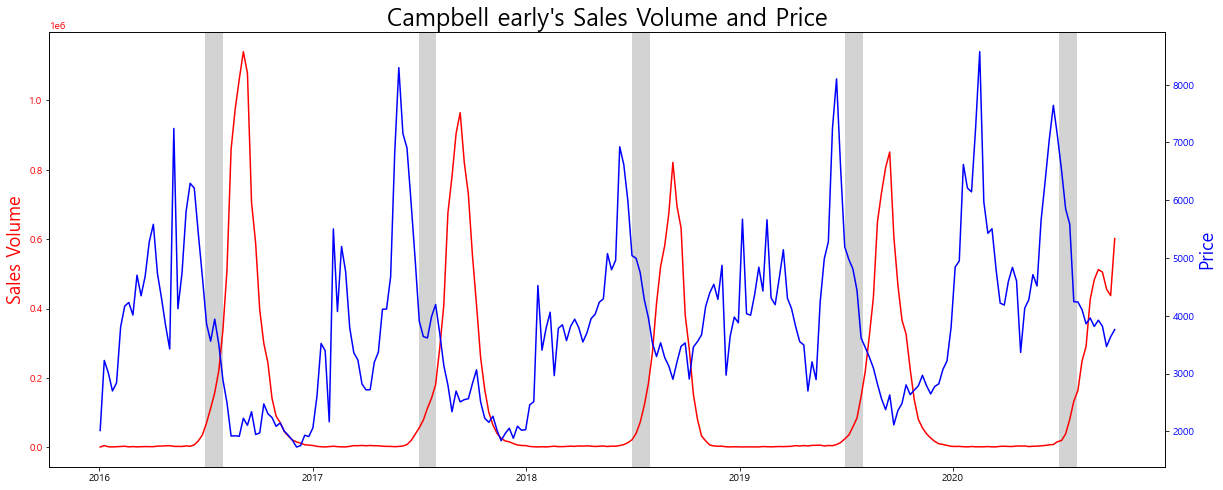

In [9]:
fig = plt.figure()
ax1 = fig.add_subplot()

for i in range(2016,2021):
    span_start = datetime(i, 7, 1)
    span_end = datetime(i, 7, 31)
    plt.axvspan(span_start, span_end, facecolor='lightgrey')
    
ax1.set_title("Campbell early's Sales Volume and Price", fontsize=24)
ax1.plot(df_camb["volume_by_kg"].resample("W").mean(), color="red")
ax1.set_ylabel('Sales Volume', fontsize=18, color="red")
ax1.tick_params(axis='y', labelcolor="red")

fig.set_size_inches(20,8)

ax2 = ax1.twinx()
ax2.plot(df_camb["cost_per_kg"].resample("W").mean(), color="blue")
ax2.set_ylabel('Price', fontsize=18, color="blue")
ax2.tick_params(axis='y', labelcolor="blue")


### [샤인마스캇 제철 : 10월 중순~말]

In [10]:
df_shine = df1[["date", "요일", "샤인마스캇_거래량(kg)", "샤인마스캇_가격(원/kg)"]]
df_shine.columns = ["date", "day", "volume_by_kg", "cost_per_kg"]
df_shine = df_shine[df_shine.volume_by_kg != 0]
df_shine['date'] = pd.to_datetime(df_shine["date"], format='%Y-%m-%d')
df_shine = df_shine.set_index("date")
df_shine.head(3)
df_shine.shape

(922, 3)

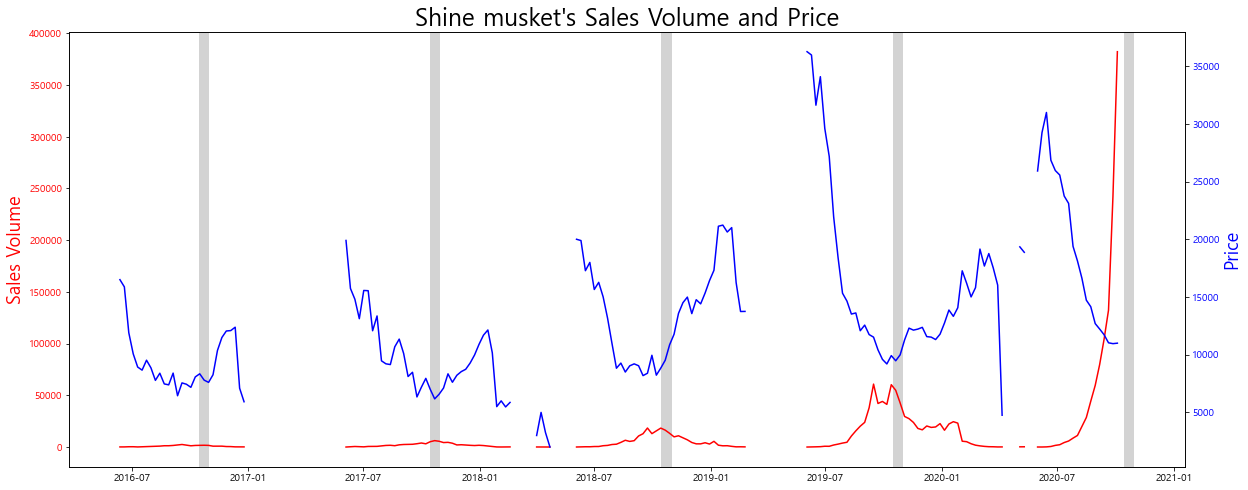

In [11]:
fig = plt.figure()
ax1 = fig.add_subplot()

for i in range(2016,2021):
    span_start = datetime(i, 10, 15)
    span_end = datetime(i, 10, 31)
    plt.axvspan(span_start, span_end, facecolor='lightgrey')
    
ax1.set_title("Shine musket's Sales Volume and Price", fontsize=24)
ax1.plot(df_shine["volume_by_kg"].resample("W").mean(), color="red")
ax1.set_ylabel('Sales Volume', fontsize=18, color="red")
ax1.tick_params(axis='y', labelcolor="red")

fig.set_size_inches(20,8)

ax2 = ax1.twinx()
ax2.plot(df_shine["cost_per_kg"].resample("W").mean(), color="blue")
ax2.set_ylabel('Price', fontsize=18, color="blue")
ax2.tick_params(axis='y', labelcolor="blue")


## [가설 2 : 각 지역마다 인기채소와 비인기채소는 다를것이다. (인기 기준 : 거래횟수)]

In [12]:
df2= pd.read_csv("C:/Users/hyun/workspace/TIL/MachineLearning/0_homework/4_viz_data_nongsan/AT_TSALET_ALL_201912.csv")
df2.head(2)
#df2.shape

,SALEDATE,WHSAL_NM,CMP_NM,PUM_NM,KIND_NM,DAN_NM,POJ_NM,SIZE_NM,LV_NM,SAN_NM,DANQ,QTY,COST,TOT_QTY,TOT_AMT
0,20191210,대구북부도매,효성청과,새송이,새송이(일반),kg,상자,.,등외,경상북도 성주군,2.0,57,2800,114.0,159600
1,20191210,대구북부도매,효성청과,느타리버섯,느타리버섯(일반),kg,상자,.,특,경상북도 성주군,4.0,2,12800,8.0,25600


In [13]:
# 컴퓨터를 지키기위해 비교적 데이터가 적은 시장 선정
df2["WHSAL_NM"].value_counts()

서울가락도매      759920
대구북부도매      220531
구리도매시장      168827
부산반여도매      141004
광주서부도매      136534
광주각화도매      126994
대전오정도매      112259
부산엄궁도매      109343
인천삼산도매      104563
인천구월도매      101248
서울강서도매       98020
대전노은도매       79641
청주도매시장       71265
안동도매시장       66366
울산도매시장       58687
수원도매시장       48492
전주도매시장       48459
진주도매시장       47337
창원내서도매시장     45937
천안도매시장       44340
안산도매시장       43776
순천도매시장       43133
창원팔용도매시장     41745
익산도매시장       38191
충주도매시장       27712
포항도매시장       25802
안양도매시장       25323
원주도매시장       20085
정읍도매시장       18531
강릉도매시장       15509
구미도매시장       15390
춘천도매시장       12809
Name: WHSAL_NM, dtype: int64

In [14]:
df2.WHSAL_NM.unique() # 순천도매시장, 천안도매시장
#df2.PUM_NM.unique()
#df2.SIZE_NM.unique()
#df2.DAN_NM.unique()

array(['대구북부도매', '부산반여도매', '순천도매시장', '대전오정도매', '정읍도매시장', '광주서부도매',
       '전주도매시장', '익산도매시장', '천안도매시장', '부산엄궁도매', '충주도매시장', '청주도매시장',
       '광주각화도매', '원주도매시장', '강릉도매시장', '춘천도매시장', '구리도매시장', '인천삼산도매',
       '인천구월도매', '수원도매시장', '안산도매시장', '창원내서도매시장', '진주도매시장', '울산도매시장',
       '창원팔용도매시장', '포항도매시장', '대전노은도매', '안동도매시장', '구미도매시장', '서울가락도매',
       '서울강서도매', '안양도매시장'], dtype=object)

In [15]:
df2.drop(["CMP_NM", "KIND_NM", "LV_NM", "SAN_NM", "POJ_NM", "SIZE_NM"], axis=1, inplace=True)
df2.head(3)

# 뽑을 행 : SALEDATE, PUM_NM, DAN_NM, POJ_NM, SIZE_NM, DANQ, QTY, COST, TOT_QTY, TOT_AMT

,SALEDATE,WHSAL_NM,PUM_NM,DAN_NM,DANQ,QTY,COST,TOT_QTY,TOT_AMT
0,20191210,대구북부도매,새송이,kg,2.0,57,2800,114.0,159600
1,20191210,대구북부도매,느타리버섯,kg,4.0,2,12800,8.0,25600
2,20191210,대구북부도매,만가닥,kg,2.0,20,6100,40.0,122000


In [16]:
df_sc = df2[df2["WHSAL_NM"] == '순천도매시장']
df_ca = df2[df2["WHSAL_NM"] == '천안도매시장']
print(df_sc.PUM_NM.unique())
print(df_ca.PUM_NM.unique())

['방울토마토' '토마토' '사과' '감귤' '딸기' '포도' '용과' '바나나' '단감' '참다래(키위)' '곶감' '배' '메론'
 '배추' '양파' '브로코리(녹색꽃양배추)' '당근' '호박' '고구마' '쪽파' '미나리' '대파' '상추' '깻잎' '무'
 '갈래곰보' '조미제품' '감자' '고들빼기' '갓' '파프리카' '토란' '시금치' '풋고추' '냉이' '생강'
 '셀러리(양미나리)' '양상추' '표고버섯' '느타리버섯' '새송이' '꽈리고추' '참나물' '차' '유자' '홍고추'
 '얼갈이배추' '열무' '부추' '피망(단고추)' '가지' '쑥갓' '오이' '양배추' '석류' '체리' '떫은감' '팽이버섯'
 '망고' '오렌지' '자몽' '우뭇가사리' '알타리무' '달래' '만감' '블루베리' '아보카도' '파인애플' '마늘' '꿀벌'
 '건고추' '비트(붉은사탕무우)' '콜라비(순무양배추)' '아욱' '수박' '레몬' '취나물' '유채' '밤' '모과' '적채'
 '미역' '꼬시래기' '다시마' '람부탄' '봄동배추' '로메인' '도라지' '근대' '고추잎' '청경채' '쌈추' '연근'
 '치커리' '기타' '고사리' '울금' '청각' '쑥' '양송이' '콩' '무청' '칼리플라워(꽃양배추)' '방아' '모자반'
 '은행' '더덕' '마' '야콘' '만가닥' '토란대' '돌나물' '고수' '대추']
['만감' '감귤' '단감' '쪽파' '열무' '시금치' '쑥갓' '부추' '갓' '냉이' '브로코리(녹색꽃양배추)' '유채'
 '취나물' '마늘' '비트(붉은사탕무우)' '콜라비(순무양배추)' '팽이버섯' '호박' '홍고추' '꽈리고추' '피망(단고추)'
 '파프리카' '풋고추' '아욱' '봄동배추' '미나리' '양송이' '느타리버섯' '배' '메론' '떫은감' '배추' '양배추'
 '얼갈이배추' '가지' '건고추' '도라지' '근대' '당근' '양파' '고구마' '상추' '돗나물' '새송이' '만가닥' '기타'
 '빈스' '깻잎' '달래' '사

In [17]:
# 순천도매시장, 천안도매시장 1년치 데이터프레임 만들기
DATA_DIR = "C:/Users/hyun/workspace/TIL/MachineLearning/0_homework/4_viz_data_nongsan"
data_files = [os.path.join(DATA_DIR, filename) for filename in os.listdir(DATA_DIR)]
df_sc_list = []
df_ca_list = []

for filename in data_files:
    df_temp = pd.read_csv(filename)
    df_temp.drop(["CMP_NM", "KIND_NM", "LV_NM", "SAN_NM", "POJ_NM", "SIZE_NM"], axis=1, inplace=True)
    df_sc_list.append(df_temp[df_temp["WHSAL_NM"] == '순천도매시장'])
    df_ca_list.append(df_temp[df_temp["WHSAL_NM"] == '천안도매시장'])

df_sc = pd.concat(df_sc_list, sort=False)
df_ca = pd.concat(df_ca_list, sort=False)

df_ca = df_ca.reset_index(drop=True)
df_sc = df_sc.reset_index(drop=True)

print(df_sc.shape)
print(df_ca.shape)

(669336, 9)
(604829, 9)


In [36]:
df_sc.head()

,SALEDATE,WHSAL_NM,PUM_NM,DAN_NM,DANQ,QTY,COST,TOT_QTY,TOT_AMT
0,20190110,순천도매시장,감귤,kg,5.0,24.0,9000.0,120.0,216000.0
1,20190110,순천도매시장,감귤,kg,5.0,22.0,9000.0,110.0,198000.0
2,20190110,순천도매시장,감귤,kg,5.0,47.0,10000.0,235.0,470000.0
3,20190110,순천도매시장,감귤,kg,5.0,1.0,3000.0,5.0,3000.0
4,20190110,순천도매시장,감귤,kg,5.0,45.0,10000.0,225.0,450000.0


In [37]:
# 두 시장에서의 NaN값 확인
#df_sc.isnull().sum() / len(df_sc)
df_ca.isnull().sum() / len(df_ca)

SALEDATE    0.0
WHSAL_NM    0.0
PUM_NM      0.0
DAN_NM      0.0
DANQ        0.0
QTY         0.0
COST        0.0
TOT_QTY     0.0
TOT_AMT     0.0
dtype: float64

In [38]:
# 거래기록이 0이거나 음수인값 확인
df_ca[(df_ca['QTY']<=0)].head(3)
# temp.shape

,SALEDATE,WHSAL_NM,PUM_NM,DAN_NM,DANQ,QTY,COST,TOT_QTY,TOT_AMT
5209,20190105,천안도매시장,열무,kg,2.0,-20.0,5330.0,-40.0,-106600.0
17749,20190115,천안도매시장,파프리카,kg,5.0,-3.0,35150.0,-15.0,-105450.0
17906,20190114,천안도매시장,딸기,kg,2.0,-4.0,17700.0,-8.0,-70800.0


<BarContainer object of 167 artists>

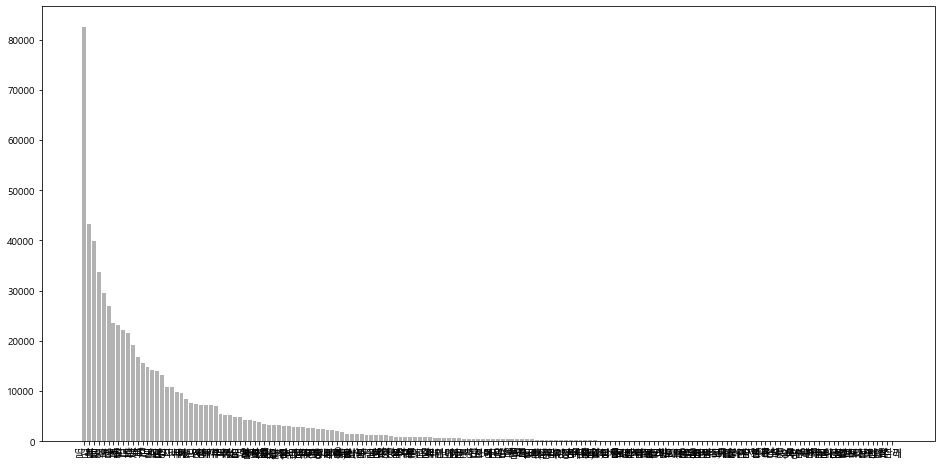

In [39]:
# 전체 품목을 순위메기려니까 너무 많아서 좀 잘라야겠다
counts = pd.DataFrame(df_sc["PUM_NM"].value_counts().reset_index())
plt.figure(figsize=(16,8))
plt.bar(counts["index"], counts["PUM_NM"],color='k', alpha=.3)

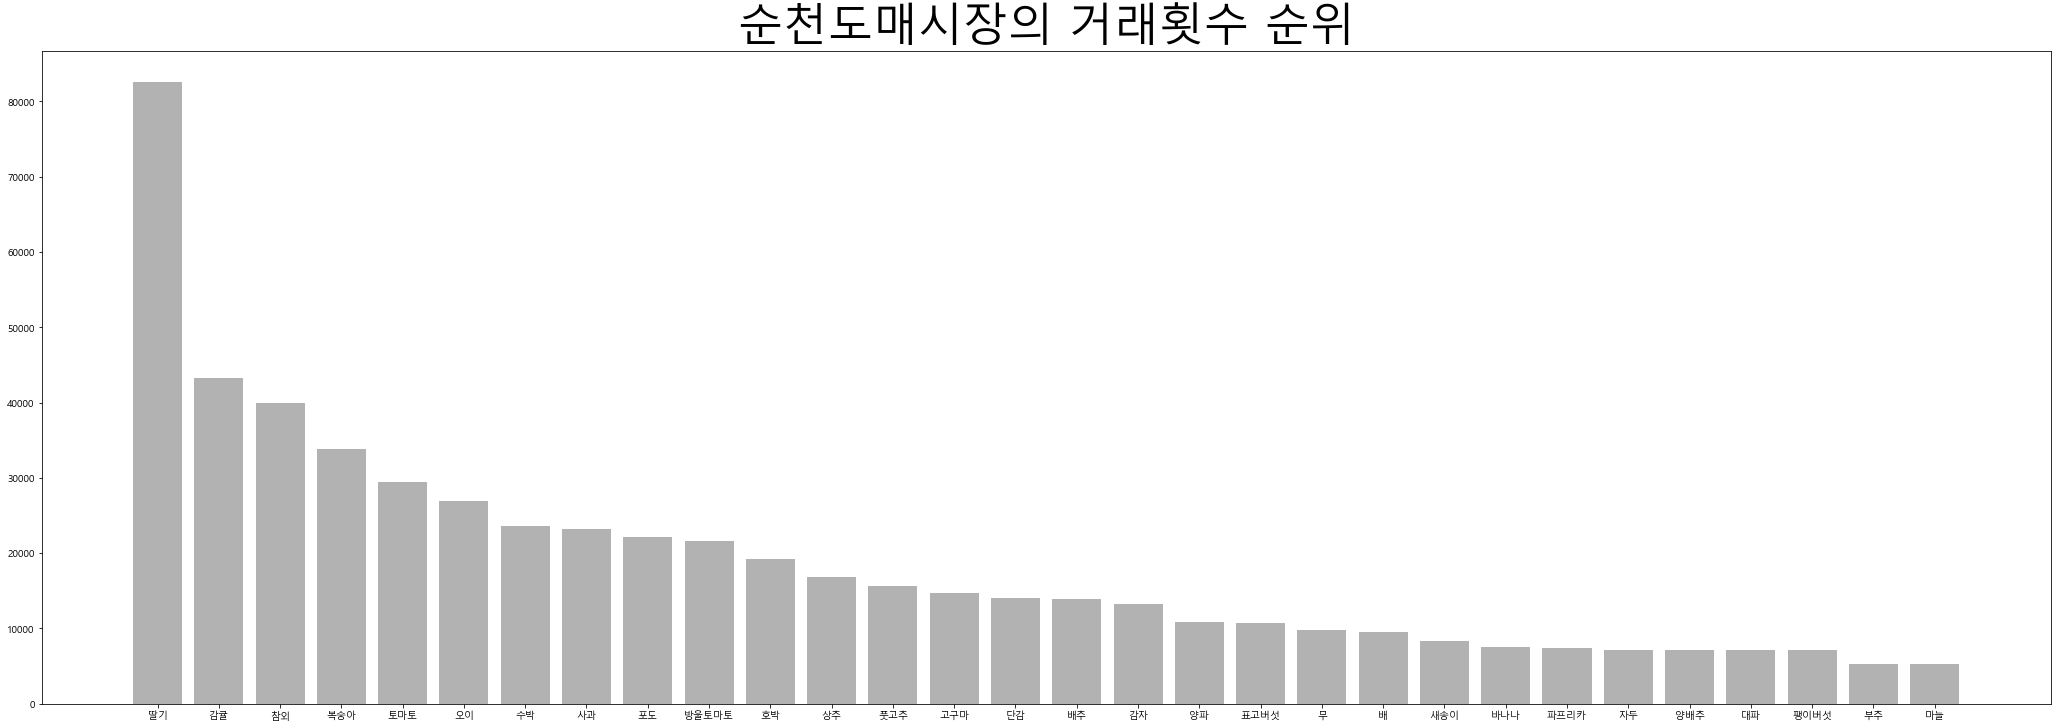

In [40]:
# 순천도매시장 먼저 30위까지만 잘라서 해보자
df_sc_rank = df_sc["PUM_NM"].value_counts().reset_index().iloc[:30]
pd.set_option('display.max_rows', None)
df_sc_rank

plt.figure(figsize=(36,12))
plt.title("순천도매시장의 거래횟수 순위", fontsize=45)
plt.bar(df_sc_rank["index"], df_sc_rank["PUM_NM"],color='k', alpha=.3)
pd.set_option('display.max_rows', None)

In [41]:
# 천안도매시장 판매횟수 순위
pd.set_option('display.max_rows', None)
df_sc_rank.rename(columns={'PUM_NM':'순천_거래횟수'}, inplace=True)
df_sc_rank.head(5)

,index,순천_거래횟수
0,딸기,82509
1,감귤,43194
2,참외,39891
3,복숭아,33777
4,토마토,29429


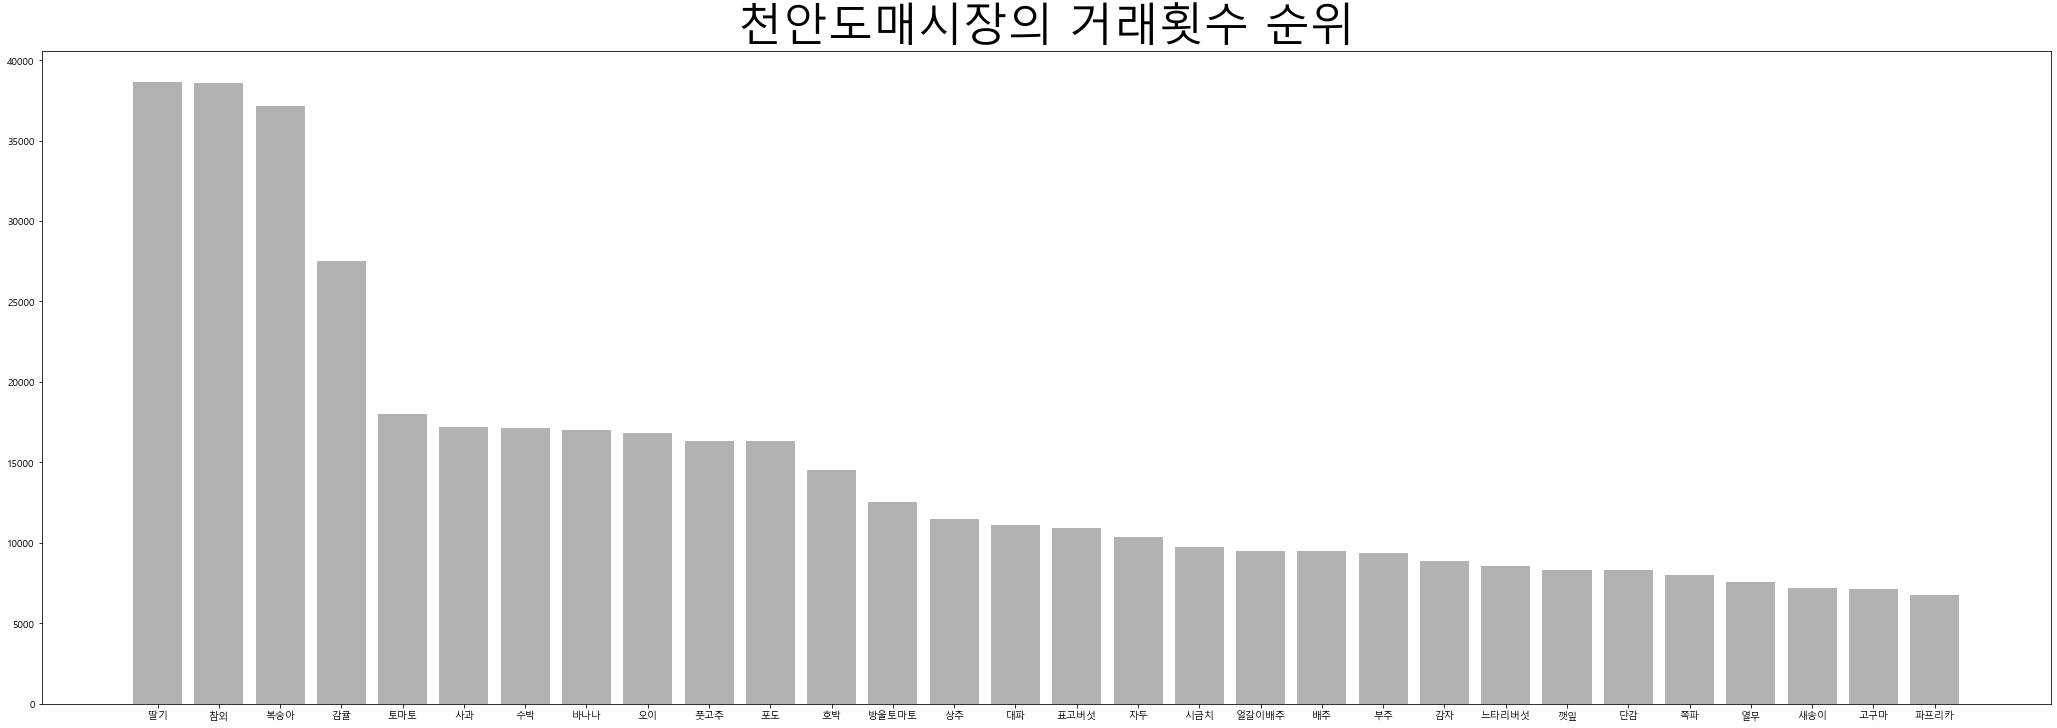

In [65]:
# 천안 도매시장도 30위까지만 잘라서 해보자
df_ca_rank = df_ca["PUM_NM"].value_counts().reset_index().iloc[:30]
pd.set_option('display.max_rows', None)
df_ca_rank

plt.figure(figsize=(36,12))
plt.title("천안도매시장의 거래횟수 순위", fontsize=45)
plt.bar(df_ca_rank["index"], df_ca_rank["PUM_NM"],color='k', alpha=.3)
pd.set_option('display.max_rows', None)

In [43]:
pd.set_option('display.max_rows', None)
df_ca_rank.rename(columns={'PUM_NM':'천안_거래횟수'}, inplace=True)
df_ca_rank.head(5)

,index,천안_거래횟수
0,딸기,38625
1,참외,38590
2,복숭아,37155
3,감귤,27516
4,토마토,18030


In [44]:
# 한 그래프 안에서 보기위해 일단 df 하나로 합쳐줌
df_rank = pd.merge(df_sc_rank,df_ca_rank,on="index")

In [62]:
# 좀 더 정확한 비교를 위해서 각 지역의 거래횟수에 각 지역의 인구수를 나눠주자.
df_rank["순천_인구당거래비율"] = df_rank["순천_거래횟수"]/280000
df_rank["천안_인구당거래비율"] = df_rank["천안_거래횟수"]/650000
df_rank["비율차이(순천-천안)"] = df_rank["순천_인구당거래비율"] - df_rank["천안_인구당거래비율"]
df_rank.head(3)

,index,순천_거래횟수,천안_거래횟수,순천_인구당거래비율,천안_인구당거래비율,비율차이(순천-천안),비율차이(천안-순천)
0,딸기,82509,38625,0.294675,0.059423,0.235252,-0.235252
1,감귤,43194,27516,0.154264,0.042332,0.111932,-0.111932
2,참외,39891,38590,0.142468,0.059369,0.083099,-0.083099


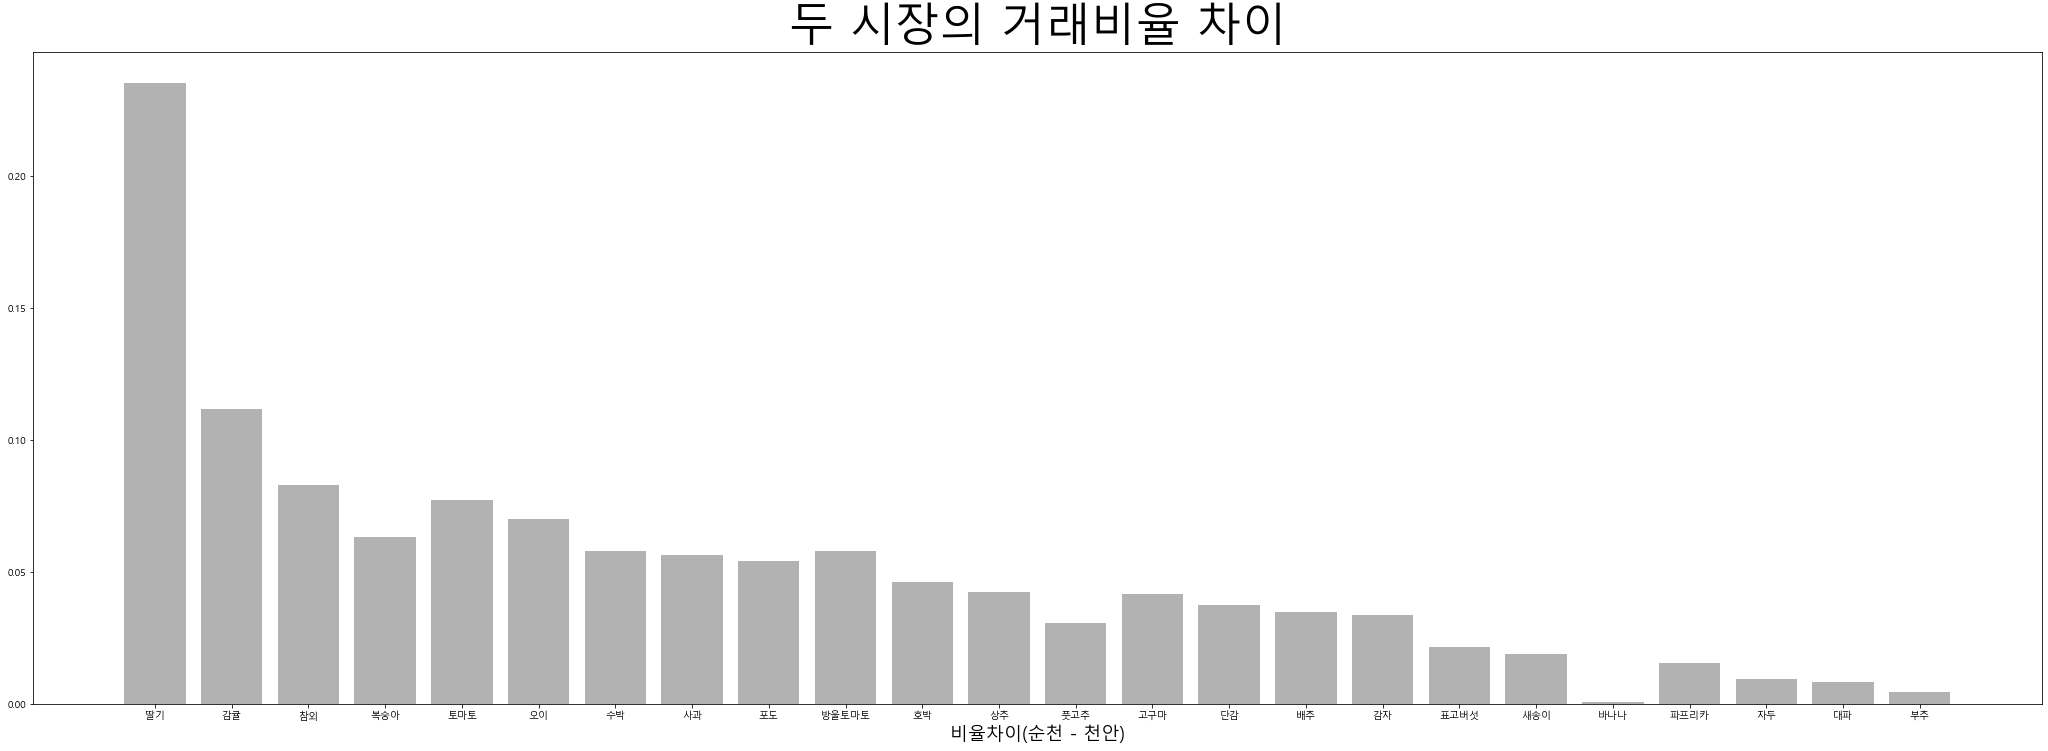

In [63]:
# 시각화
plt.figure(figsize=(36,12))
plt.title("두 시장의 거래비율 차이", fontsize=45)
plt.xlabel('비율차이(순천 - 천안)', fontsize=18)
plt.bar(df_rank["index"], df_rank["비율차이(순천-천안)"],color='k', alpha=.3)
pd.set_option('display.max_rows', None) 

## 결론 : 
#### 순천이 천안보다 인구당 과일 소비를 더한다(딸기, 감귤, 참외, 복숭아 등등)
### -> 순천에서 과일장사하면 더 수익에 안정성이 생길것이다..?
-> 설득력없다..
#### 오히려 순천이 천안보다 딸기 선호도가 높으니 순천에 딸기 장사를 하는게 더 나을것이다~식의 결론이 더 낫지 않을까

## [가설 3: 가장 수익성이 좋은 채소는?]
### 지역마다 각 채소들의 시세는 다를수도있으니, 내가 살고있는 부산의 "부산엄궁도매"시장을 타겟으로

In [48]:
df2.head(3)

,SALEDATE,WHSAL_NM,PUM_NM,DAN_NM,DANQ,QTY,COST,TOT_QTY,TOT_AMT
0,20191210,대구북부도매,새송이,kg,2.0,57,2800,114.0,159600
1,20191210,대구북부도매,느타리버섯,kg,4.0,2,12800,8.0,25600
2,20191210,대구북부도매,만가닥,kg,2.0,20,6100,40.0,122000


In [49]:
# 부산엄궁도매 1년치 데이터프레임 만들기
DATA_DIR = "C:/Users/hyun/workspace/TIL/MachineLearning/0_homework/4_viz_data_nongsan"
data_files = [os.path.join(DATA_DIR, filename) for filename in os.listdir(DATA_DIR)]
df_bs_list = []

for filename in data_files:
    df_temp = pd.read_csv(filename)
    df_temp.drop(["CMP_NM", "KIND_NM", "DAN_NM", "SAN_NM"], axis=1, inplace=True)
    df_bs_list.append(df_temp[df_temp["WHSAL_NM"] == '부산엄궁도매'])

df_bs = pd.concat(df_bs_list, sort=False)
df_bs = df_bs.reset_index(drop=True)

print(len(df_bs_list))
print(df_bs.shape)

12
(1580873, 11)


### $총　거래금액 \over 총　거래한 횟수 X 총　거래무게$

In [67]:
# 일단 nan값은 없음
df_bs.head(3)
df_bs.isnull().sum() / len(df_bs)

SALEDATE    0.000000
WHSAL_NM    0.000000
PUM_NM      0.000000
POJ_NM      0.000011
SIZE_NM     0.000000
LV_NM       0.000002
DANQ        0.000000
QTY         0.000000
COST        0.000000
TOT_QTY     0.000000
TOT_AMT     0.000000
dtype: float64

In [77]:
# 위 식의 3개 인자를 비교하기 위해 따로 빼서 df만들어줌
# df_profit 만들어서 거래횟수 추가, 거래 횟수 너무 적은애는 뺴자
df_profit = df_bs["PUM_NM"].value_counts().to_frame()
df_profit.rename(columns = {'PUM_NM' : 'count'}, inplace=True)
df_profit.head(3)

,count
토마토,86023
표고버섯,84683
복숭아,79917


In [52]:
# 이상치 처리

In [78]:
# 총 거래무게, 총 거래가격 추가
df_profit["weight"] = df_bs.groupby("PUM_NM")["TOT_QTY"].sum()
df_profit["money"] = df_bs.groupby("PUM_NM")["TOT_AMT"].sum()
df_profit["profit"] = df_profit["money"] / (df_profit["count"] * df_profit["weight"])
#df_profit["count"] = df_profit["count"].astype(float)
df_profit.head(3)

,count,weight,money,profit
토마토,86023,5869086.10,1.086208e+10,0.021514
표고버섯,84683,1718043.65,8.942400e+09,0.061464
복숭아,79917,4290811.40,8.915721e+09,0.026000


In [79]:
# 거래횟수 좀 많은애들로 자르자(20위까지)
df_profit = df_profit.iloc[:20]
#df_profit.head(3)

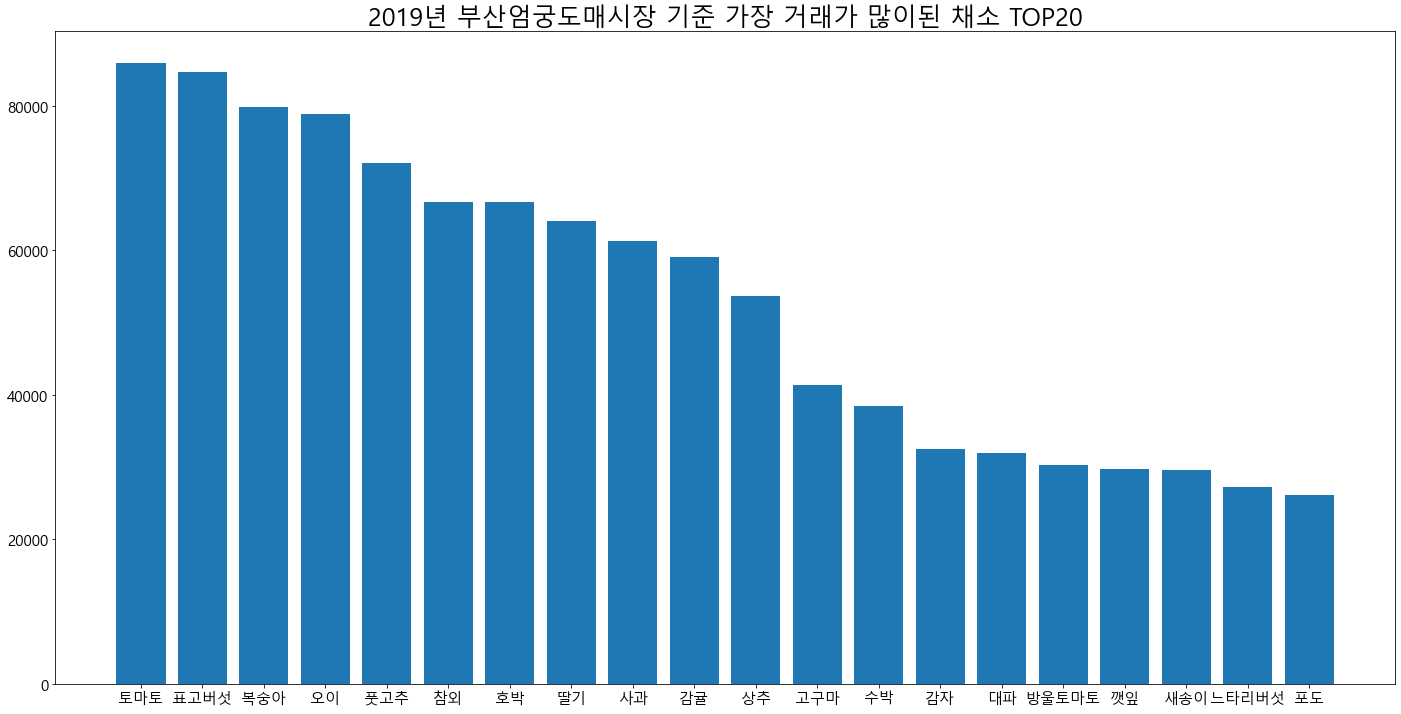

In [86]:
# 거래 많이된 채소들 먼저 확인
fig = plt.figure()
plt.rc('font', family = font_name)
fig.set_size_inches(24,12)
plt.title('2019년 부산엄궁도매시장 기준 가장 거래가 많이된 채소 TOP20', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
x_data=df_profit.index
y_data=df_profit["count"]
plt.bar(x_data,y_data) #bar(막대를 표시할 위치, 막대의 높이)
plt.show()


In [87]:
df_profit = df_profit.sort_values(by=["weight"], ascending=[False]) 
df_profit.head(3)

,count,weight,money,profit
감자,32496,13169328.0,1.261675e+10,0.029482
수박,38480,12086604.5,1.291271e+10,0.027764
대파,31962,11581135.7,1.078980e+10,0.029149


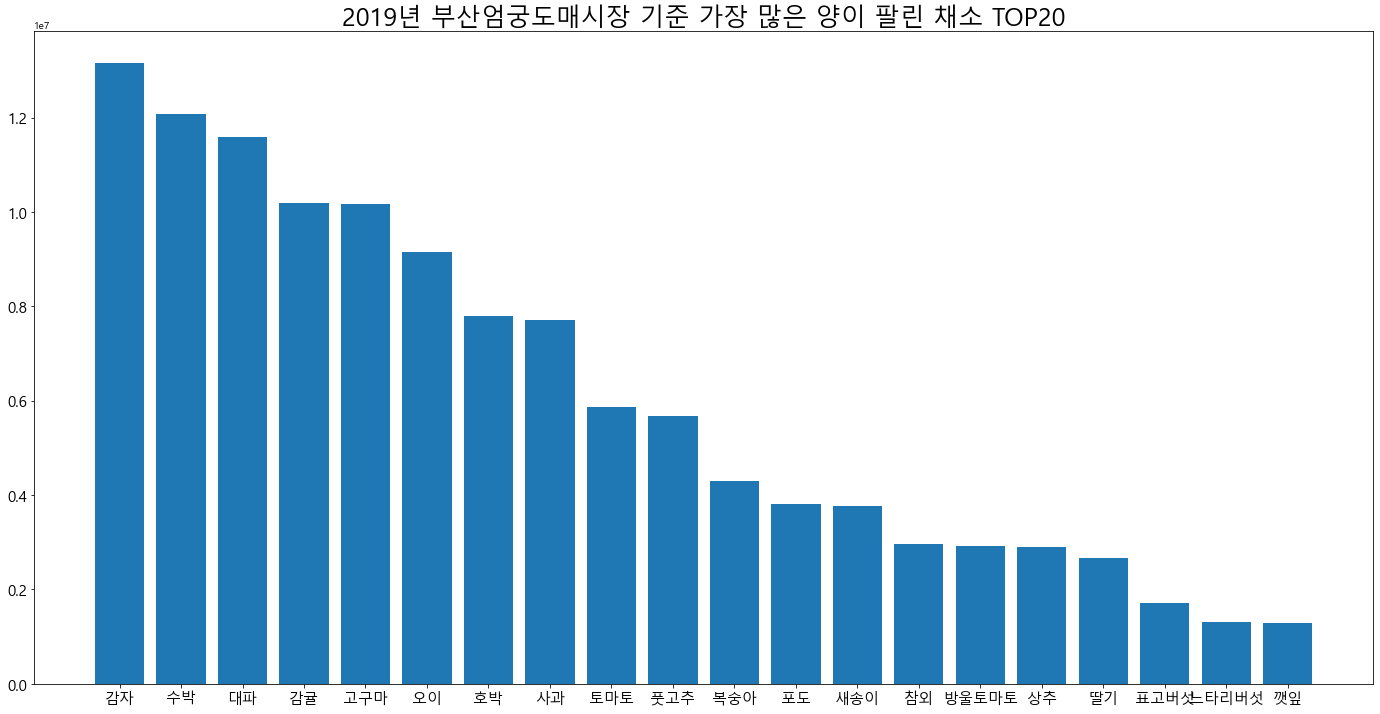

In [88]:
# 가장 많은 무게 팔린 채소들 확인
fig = plt.figure()
plt.rc('font', family = font_name)
fig.set_size_inches(24,12)
plt.title('2019년 부산엄궁도매시장 기준 가장 많은 양이 팔린 채소 TOP20', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
x_data=df_profit.index
y_data=df_profit["weight"]
plt.bar(x_data,y_data) #bar(막대를 표시할 위치, 막대의 높이)
plt.show()


In [90]:
# 이번엔 거래된 총액 기준 정렬
df_profit = df_profit.sort_values(by=["money"], ascending=[False]) 
df_profit.head(3)

,count,weight,money,profit
풋고추,72123,5682630.10,1.790058e+10,0.043676
사과,61341,7707373.48,1.771120e+10,0.037462
고구마,41310,10163058.00,1.755426e+10,0.041812


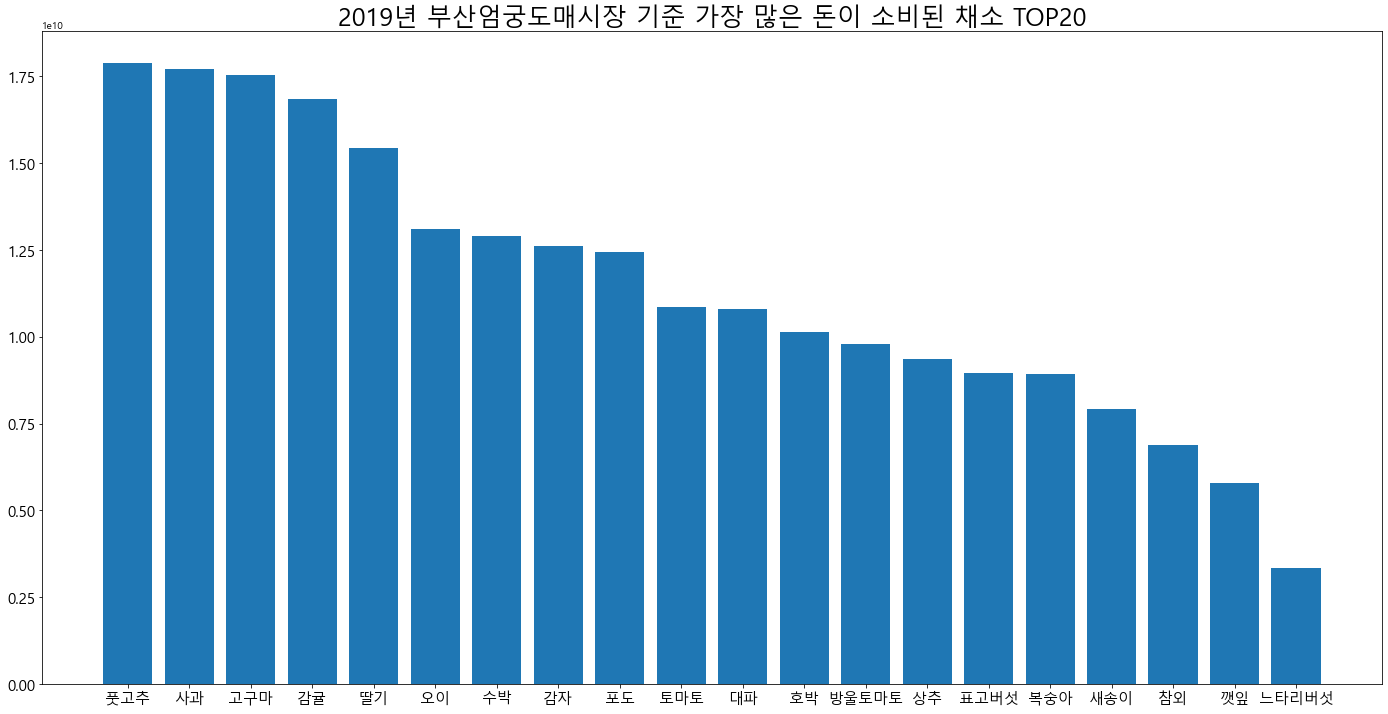

In [91]:
fig = plt.figure()
plt.rc('font', family = font_name)
fig.set_size_inches(24,12)
plt.title('2019년 부산엄궁도매시장 기준 가장 많은 돈이 소비된 채소 TOP20', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
x_data=df_profit.index
y_data=df_profit["money"]
plt.bar(x_data,y_data) #bar(막대를 표시할 위치, 막대의 높이)
plt.show()

In [55]:
# 마지막으로 수익성으로 정렬
df_profit = df_profit.sort_values(by=["profit"], ascending=[False]) 

,count,weight,money,profit
깻잎,29770,1284104.3,5.799652e+09,0.151713
포도,26122,3819857.4,1.244025e+10,0.124674
방울토마토,30304,2915884.6,9.805053e+09,0.110963


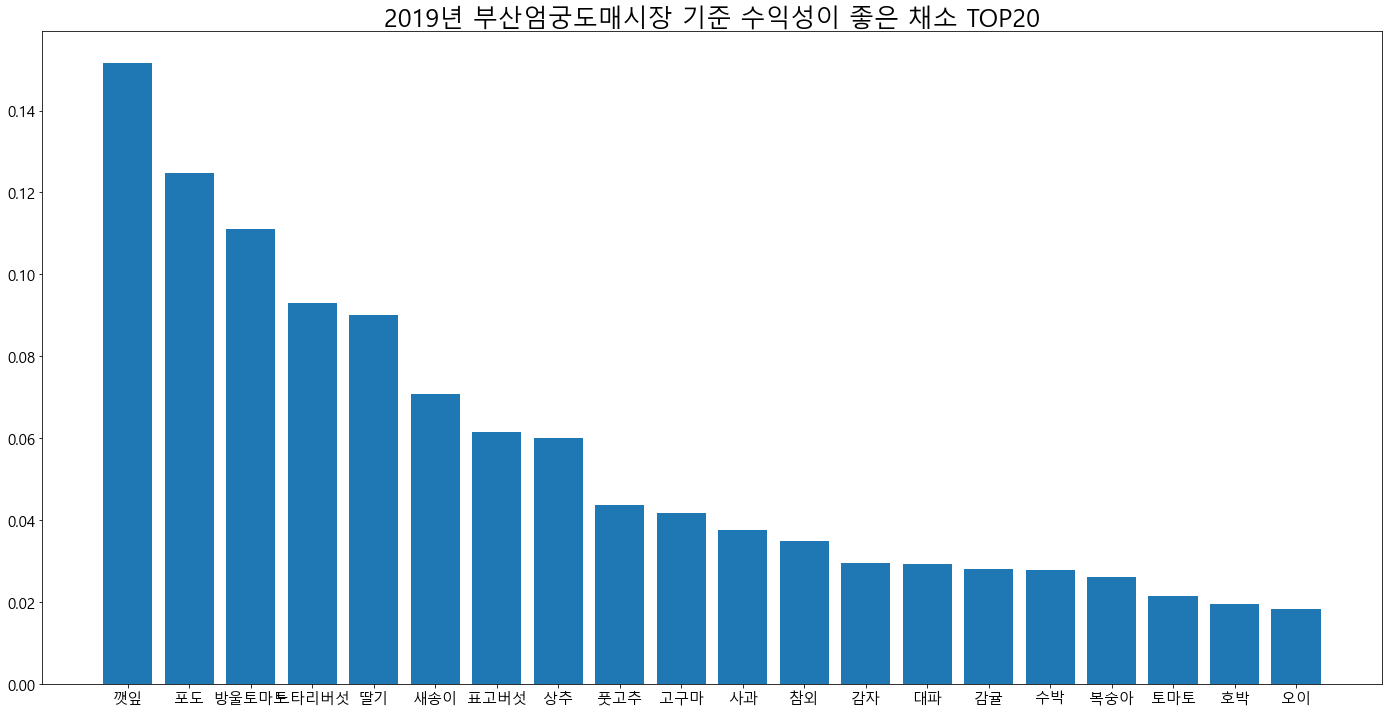

In [56]:
# 수익성 시각화
x = np.arange(20)
product = df_profit.index
profit = df_profit.profit

plt.figure(figsize=(24, 12))
plt.title('2019년 부산엄궁도매시장 기준 수익성이 좋은 채소 TOP20', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.bar(x, profit)
plt.xticks(x, product)

plt.show()

## [가설 4 : 산지 채소들은 가까운 도매시장에서 많이 거래될것이다]